<a href="https://colab.research.google.com/github/2303A51692/AIML-LAB/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
file_path = '/content/Most Popular Programming Languages.csv'
df = pd.read_csv(file_path)

## Data Overview

In [5]:
df.head()

,Month,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%)
0,2004-01,30,98,96,76,100,6,1,9,2,78
1,2004-02,29,98,97,86,99,6,2,9,1,91
2,2004-03,28,100,100,87,97,5,2,9,2,99
3,2004-04,28,98,97,89,100,6,1,9,2,95
4,2004-05,28,91,99,84,92,6,2,10,3,86


## Data Preprocessing

In [6]:
# Convert 'Month' to datetime format
df['Month'] = pd.to_datetime(df['Month'])

## Exploratory Data Analysis

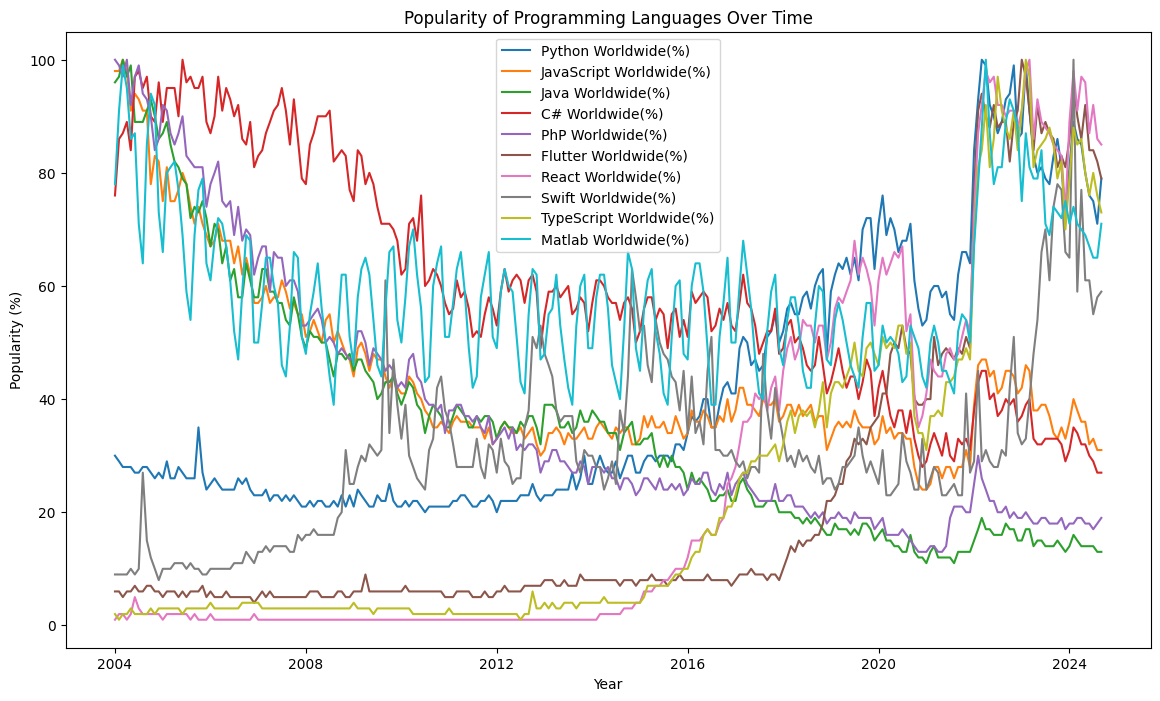

In [7]:
# Plot the popularity of each programming language over time
plt.figure(figsize=(14, 8))
for column in df.columns[1:]:
    plt.plot(df['Month'], df[column], label=column)
plt.xlabel('Year')
plt.ylabel('Popularity (%)')
plt.title('Popularity of Programming Languages Over Time')
plt.legend()
plt.show()

## Correlation Analysis

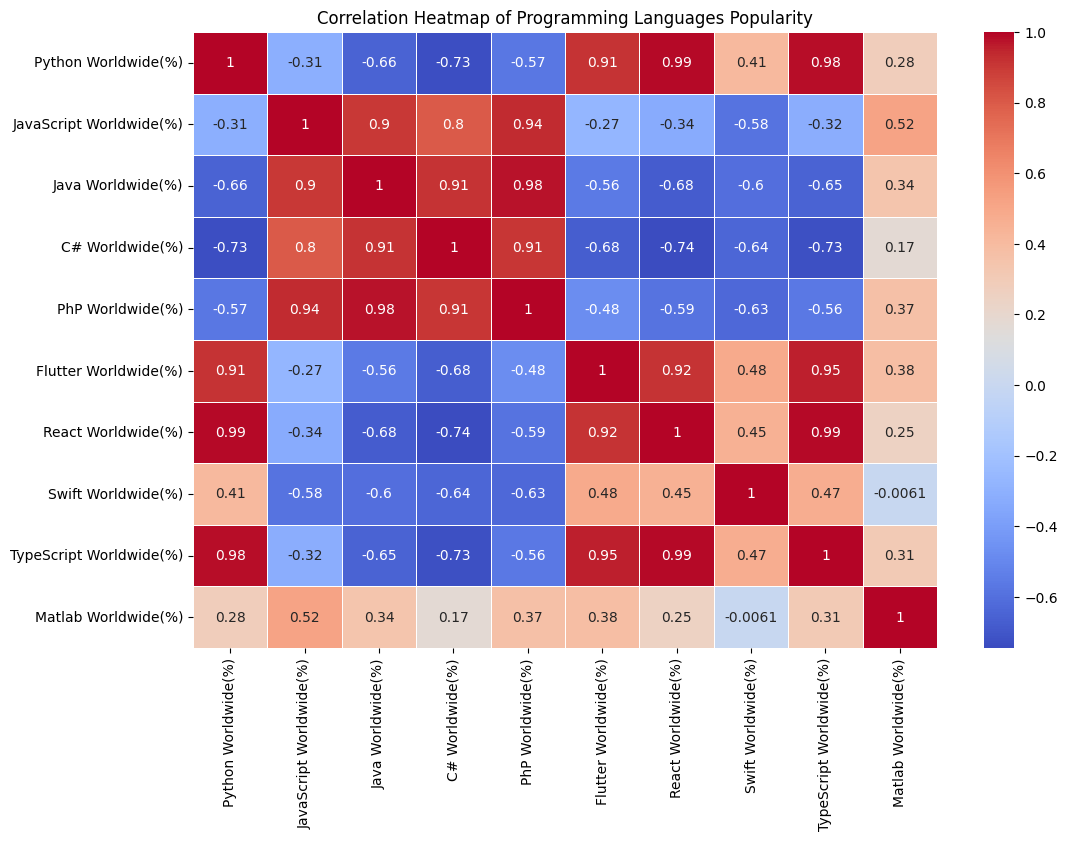

In [8]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Programming Languages Popularity')
plt.show()

## Predictive Analysis

In [9]:
# Prepare the data for prediction
df['Year'] = df['Month'].dt.year
X = df[['Year']]
y = df['Python Worldwide(%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(121.15595918387609, 0.72198902608499)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load the data into a DataFrame
data = {
    "Month": [
        "2004-01", "2004-02", "2004-03", "2004-04", "2004-05",
        "2004-06", "2004-07", "2004-08", "2004-09"
    ],
    "Python Worldwide(%)": [30, 29, 28, 28, 28, 27, 27, 28, 28],
    "JavaScript Worldwide(%)": [98, 98, 100, 98, 91, 94, 93, 91, 91],
    "Java Worldwide(%)": [96, 97, 100, 97, 84, 89, 89, 89, 91],
    "C# Worldwide(%)": [76, 86, 87, 89, 92, 97, 98, 95, 97],
    "PhP Worldwide(%)": [100, 99, 97, 100, 92, 97, 99, 94, 93],
    "Flutter Worldwide(%)": [6, 6, 5, 6, 6, 7, 6, 6, 7],
    "React Worldwide(%)": [1, 2, 2, 1, 2, 5, 3, 2, 2],
    "Swift Worldwide(%)": [9, 9, 9, 9, 10, 9, 10, 27, 15],
    "TypeScript Worldwide(%)": [2, 1, 2, 2, 3, 2, 2, 2, 2],
    "Matlab Worldwide(%)": [78, 91, 99, 95, 86, 87, 71, 64, 85]
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 2: Create a target variable based on threshold
threshold = 80
df['Matlab Popularity'] = df['Matlab Worldwide(%)'].apply(lambda x: 1 if x > threshold else 0)

# Step 3: Define features and target variable
X = df.drop(['Month', 'Matlab Worldwide(%)', 'Matlab Popularity'], axis=1)
y = df['Matlab Popularity']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 8: Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.5
Confusion Matrix:
 [[0 1]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

